**Google Playstore Analysis Using Python.**

Dataset has the information about the Apps,Rating & Downloads of Google Playstore.

**Importing Libraries.**

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

**Read Data.**

In [101]:
df=pd.read_csv("googleplaystore-dataset.csv")

**Data Cleaning and Preprocessing.**

In [102]:
df.shape

(10841, 13)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


* Dataset has 10841 rows and 13 columns.
* Categorical features - Category,Type,Content rating,Genres,
* Numerical features - Rating,reviews,size,install,price,current version
* There are null values in Rating,Type,Content rating,Current version,Android version.

Find out null values in the dataframe.

In [104]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

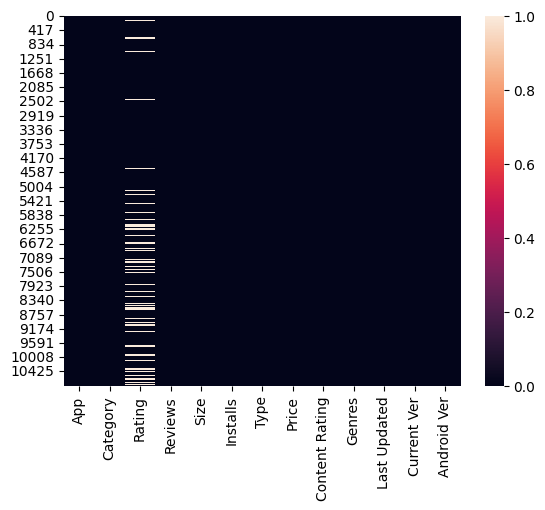

In [105]:
sns.heatmap(df.isnull())
plt.show()

Dropping the null values as it does not make a big difference.

In [106]:
df.dropna(axis = 0, inplace =True)

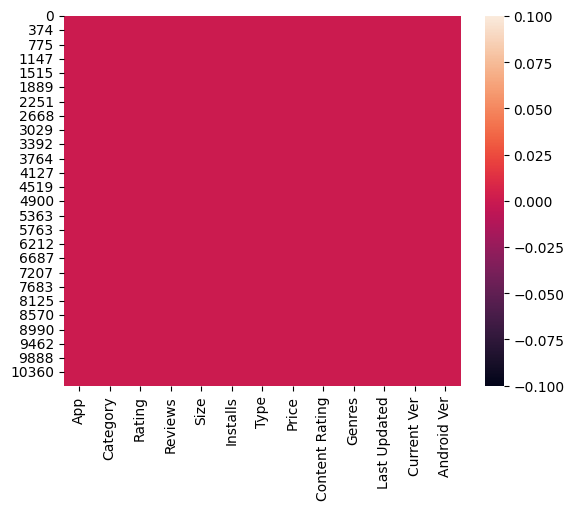

In [107]:
sns.heatmap(df.isnull())
plt.show()

Now check the duplicate values in the dataframe.

In [108]:
df.duplicated().sum()

474

In [109]:
df.drop_duplicates(keep='first',inplace=True)

In [110]:
df.duplicated().sum()

0

* There were around 474 duplicate values.
* We have dropped them.

Check the unique categories and drop the categories which are invalid.

In [111]:
list(pd.unique(df['Category']))

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION']

In [112]:
df=df[df['Category']!='1.9']

* We have removed a category named 1.9 which is invalid.

Deleting the unecessary columns. 
Here in the dataframe current version and android version are unnecessary for analysis .
So we are dropping those columns

In [113]:
df=df.drop(['Current Ver','Android Ver'],axis=1)

Changing the datatypes of required columns and making them in a proper way.

In [114]:
df['Reviews']=df['Reviews'].astype('int')
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Installs']=pd.to_numeric(df['Installs'].replace({'\+': '', ',': ''}, regex=True))
df['Price']= pd.to_numeric(df['Price'].replace({'\$': '', ',': ''}, regex=True))

Adding a new column updated_year from the exsisting column Last updated.

In [115]:
df['updated_year'] = df['Last Updated'].dt.year

**Exploratory Data Analysis.**

**Top categories**

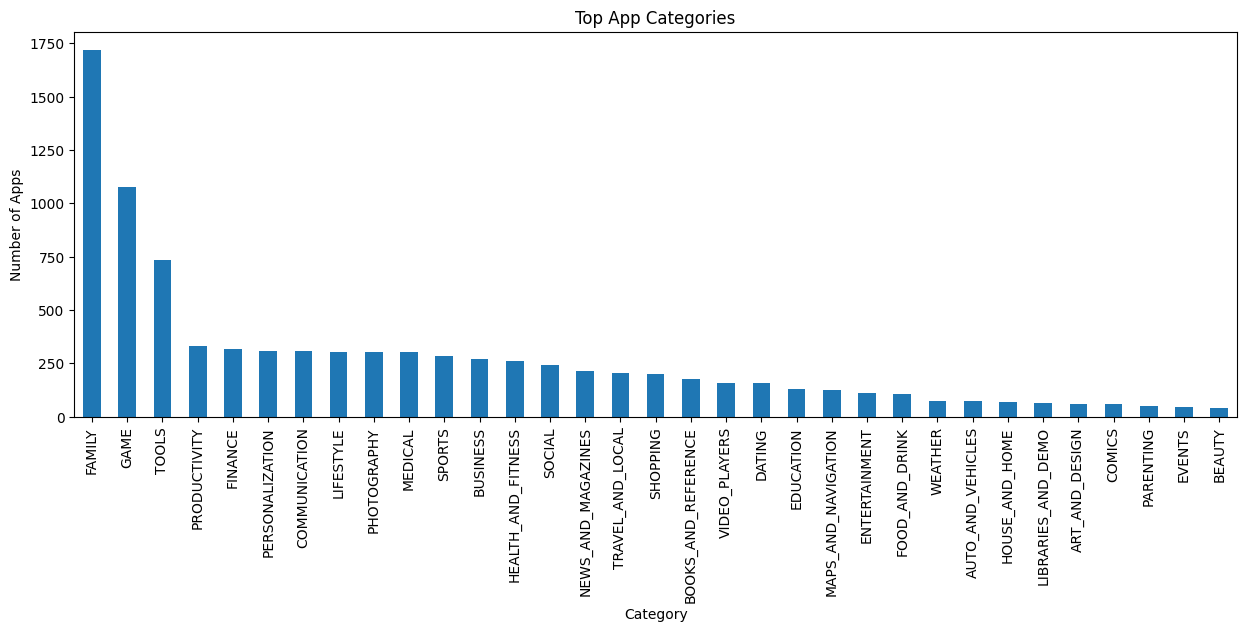

In [116]:
plt.figure(figsize=(15,5))
df.Category.value_counts().plot(kind="bar")
plt.title("Top App Categories")
plt.ylabel("Number of Apps")
plt.show()

* From the graph we can say that Family, Game and Tools are top 3 categories.

In [117]:
app_type_count=df.Type.value_counts()
app_type_count

Type
Free    8275
Paid     611
Name: count, dtype: int64

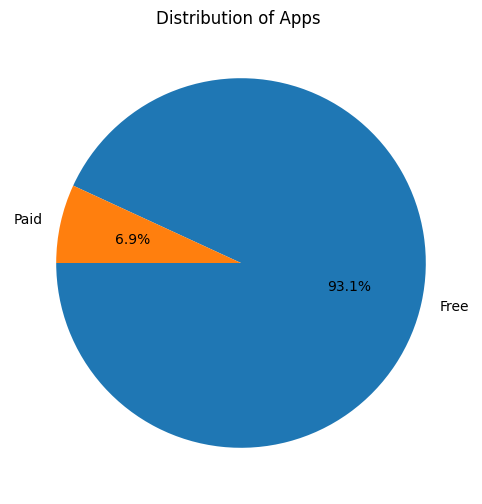

In [118]:
plt.figure(figsize=(12,6))
plt.title("Distribution of Apps ")
plt.pie(app_type_count, labels=app_type_count.index, autopct='%1.1f%%', startangle=180);

* From graph we can say that only 7% apps are paid and rest 93% are free for users.

In [119]:
app_content_ratings=df['Content Rating'].value_counts()
app_content_ratings

Content Rating
Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

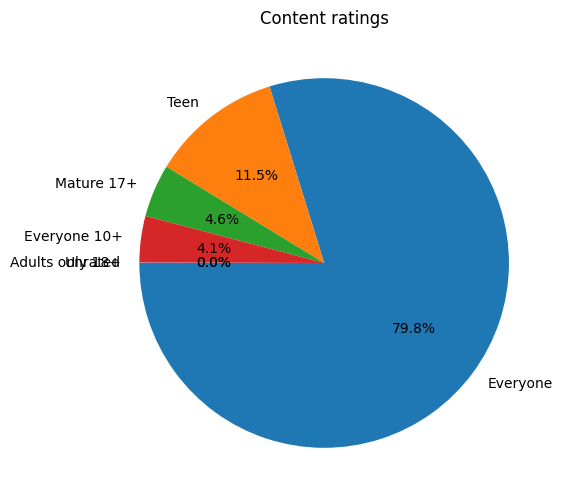

In [120]:
plt.figure(figsize=(12,6))
plt.title("Content ratings")
plt.pie(app_content_ratings, labels=app_content_ratings.index, autopct='%1.1f%%', startangle=180);

* We can say that almost 80% apps can be used by everyone .

**Which app categories have highest downloads??**

In [121]:
high_install_df= df[df.Installs==df.Installs.max()]
print("There are {} categories having highest downloads as follows".format(len(high_install_df.Category.unique())))
high_install_df.Category.unique().tolist()

There are 12 categories having highest downloads as follows


['BOOKS_AND_REFERENCE',
 'COMMUNICATION',
 'ENTERTAINMENT',
 'GAME',
 'SOCIAL',
 'PHOTOGRAPHY',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PRODUCTIVITY',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'FAMILY']

**Which are top 10 paid apps by considering number of downloads and rating??**

In [122]:
paid_apps=df[df['Type']=='Paid']
paid_apps[['App','Category','Rating','Installs','Price']].sort_values(['Installs','Rating'],ascending=False).head(10)

,App,Category,Rating,Installs,Price
4034,Hitman Sniper,GAME,4.6,10000000,0.99
2241,Minecraft,FAMILY,4.5,10000000,6.99
4347,Minecraft,FAMILY,4.5,10000000,6.99
9678,Where's My Water?,FAMILY,4.7,1000000,1.99
4260,Cut the Rope GOLD,FAMILY,4.6,1000000,0.99
5631,Five Nights at Freddy's,GAME,4.6,1000000,2.99
8804,DraStic DS Emulator,GAME,4.6,1000000,4.99
8860,Bloons TD 5,FAMILY,4.6,1000000,2.99
9941,Tasker,TOOLS,4.6,1000000,2.99
5578,Sleep as Android Unlock,LIFESTYLE,4.5,1000000,5.99


**Which apps have rating below average and downloads above average??**

**For paid apps**

In [123]:
(paid_apps[(paid_apps.Rating<paid_apps.Rating.mean()) & (paid_apps.Installs>paid_apps.Installs.mean())])[['App','Rating','Installs','Price']]

,App,Rating,Installs,Price
3403,Beautiful Widgets Pro,4.2,1000000,2.49
4901,Assassin's Creed Identity,3.7,500000,1.99
9478,Farming Simulator 16,4.2,500000,2.99


**For Free apps**

In [124]:
free_apps=df[df['Type']=='Free']
free_apps[(free_apps.Rating<free_apps.Rating.mean())&(free_apps.Installs>free_apps.Installs.mean())][['App','Rating','Installs','Price']]

,App,Rating,Installs,Price
152,Google Play Books,3.9,1000000000,0.0
192,Docs To Go™ Free Office Suite,4.1,50000000,0.0
201,Facebook Pages Manager,4.0,50000000,0.0
225,Secure Folder,3.8,50000000,0.0
335,Messenger – Text and Video Chat for Free,4.0,1000000000,0.0
...,...,...,...,...
10196,Fart sound pranks,3.8,50000000,0.0
10200,Facebook Pages Manager,4.0,50000000,0.0
10513,Flight Simulator: Fly Plane 3D,4.0,50000000,0.0
10549,Toy Truck Rally 3D,4.0,50000000,0.0


**Top 25 Genres**

In [125]:
df.Genres.unique()
app_Genres_df=df.Genres.value_counts().head(25)
app_Genres_df

Genres
Tools                      732
Entertainment              498
Education                  446
Action                     349
Productivity               334
Finance                    317
Personalization            308
Communication              307
Lifestyle                  304
Photography                304
Medical                    302
Sports                     299
Business                   270
Health & Fitness           262
Social                     244
News & Magazines           214
Arcade                     205
Travel & Local             204
Shopping                   202
Simulation                 193
Casual                     183
Books & Reference          177
Dating                     159
Video Players & Editors    158
Maps & Navigation          124
Name: count, dtype: int64

**Count of paid apps category wise**

In [126]:
paid_categories=paid_apps.Category.value_counts()
paid_categories

Category
FAMILY                 157
GAME                    77
PERSONALIZATION         65
MEDICAL                 64
TOOLS                   63
SPORTS                  22
COMMUNICATION           22
LIFESTYLE               18
PRODUCTIVITY            18
PHOTOGRAPHY             16
FINANCE                 13
HEALTH_AND_FITNESS      11
BUSINESS                 9
BOOKS_AND_REFERENCE      8
TRAVEL_AND_LOCAL         8
WEATHER                  7
MAPS_AND_NAVIGATION      5
EDUCATION                4
VIDEO_PLAYERS            4
DATING                   4
ART_AND_DESIGN           3
FOOD_AND_DRINK           2
ENTERTAINMENT            2
NEWS_AND_MAGAZINES       2
SHOPPING                 2
SOCIAL                   2
PARENTING                2
AUTO_AND_VEHICLES        1
Name: count, dtype: int64

**Top 5 apps from photography category**

In [127]:
df[df.Category=='PHOTOGRAPHY'].sort_values(['Rating','Installs','Price'],ascending=False).head(5)[['App','Rating','Installs','Price']]

,App,Rating,Installs,Price
5238,Selfie With Champion AJ Style,5.0,500,0.0
8281,DC-014,5.0,500,0.0
5230,AJ Cam,5.0,100,0.0
7127,CB VIDEO VISION,5.0,100,0.0
7291,CG Prints,5.0,100,0.0


**Inferences and Conclusion**

We have drawn some inferences as:

* Most apps are in 3 categories FAMILY,GAME,TOOLS
* There are 92.2% free apps & only 7.8% paid apps on google playstore.
* There are more than 400 apps in 3 app genres: Tools, Entertainment, Education
* From the above graph we can infer that around 80% apps can be used by everyone.
* There are some apps whose rating is below average and downloads are above average.